In [1]:
import numpy as np
import pandas as pd

(1) загрузите данные о доходах населения. 

In [2]:
df = pd.read_csv('adult.csv') # Загружаем данные
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


(2) уберите строки с неизвестными значениями.

In [4]:
df = df.replace('?',np.nan)
df = df.dropna()

(3) постройте тепловую матрицу корреляции. Если обнаружатся полностью зависимые признаки - оставьте только один из двух. (

<AxesSubplot:>

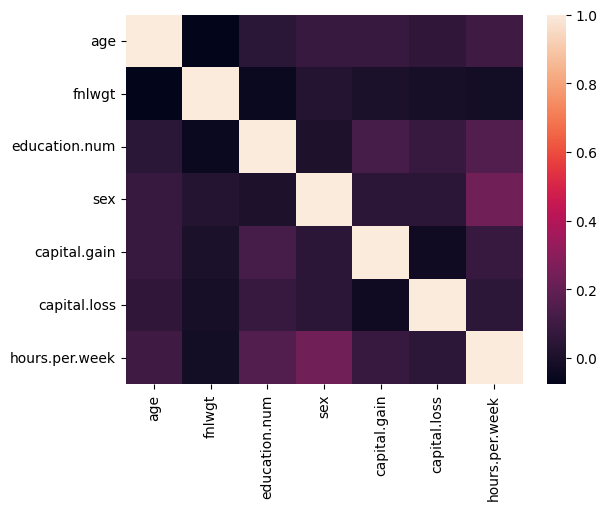

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
del df['education']

4) рассмотрев данные, вручную перекодируйте бинарные категориальные признаки в числовые. 

In [6]:
y = df['income'].replace({'<=50K': 0, '>50K': 1})
df['sex'] = df['sex'].replace({'Female': 0, 'Male': 1})
df['race'] = df['race'].replace({'White': 0, 'Black': 1})

X = df.drop('income', axis=1)

(4) остальные категориальные признаки закодируйте методом One Hot Encoding или pd.get_dummies. 

In [7]:
X_transform = pd.get_dummies(X)
X_transform

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,0,4356,18,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,0,3770,45,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,1,0,3770,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,0,38,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0


(5) разбейте выборку на обучающую и тестовую, обучите модель логистической регрессии, оцените качество с помощью classification_report. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report # Позволяет получить сразу несколько метрик

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.3, random_state = 42)

lr = LogisticRegression() # Создаем экземпляр класса
lr.fit(X_train, y_train)  # Обучаем
y_pred = lr.predict(X_test) # Делаем предсказание на тестовой выборке

print(classification_report(y_test, y_pred)) # Оценим качество

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6754
           1       0.72      0.26      0.38      2295

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.75      9049



(6) выполните нормализацию признаков и повторите пункт 5. 

In [11]:
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

scale = Normalizer() 
X_scale = scale.fit_transform(X_transform) 

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.3, random_state = 42)

lr = LogisticRegression() 
lr.fit(X_train, y_train)  
y_pred = lr.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6754
           1       0.92      0.09      0.16      2295

    accuracy                           0.77      9049
   macro avg       0.84      0.54      0.51      9049
weighted avg       0.80      0.77      0.69      9049




(7) выполните стандартизацию признаков и повторите пункт 5. Сравнив 5, 6, 7, ответьте на вопрос: как меняется качество модели?

In [9]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 

scale = StandardScaler() 
X_scale = scale.fit_transform(X_transform) 

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.3, random_state = 42)

lr = LogisticRegression() 
lr.fit(X_train, y_train)  
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6754
           1       0.73      0.61      0.66      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84      0.84      0.84      9049



при стандартизации качество получилось самым большим, при нормализации качество упало

 (8) Подберите с помощью GridSearchCV оптимальное значение гиперпараметра С (L2-регуляризация) модели логистической регрессии. 

In [13]:
from sklearn.linear_model import LogisticRegressionCV
logitcv = LogisticRegressionCV(max_iter = 1000)
logitcv.fit(X_scale, y)
print( round(logitcv.score(X_scale, y), 3))

0.778


(9) сделайте выводы по проделанной работе.

не разобрался в тепловой матрице корреляции((((

перевели все категориальные (слова) признаки в числовые, чтобы модель могла с ними работать

обучили модель на обычных данных, на нормализованных данные и на стандартизованных данных

это нужно чтобы привести данные в один масштаб, чтобы модель работала правильно

при нормализации данные принимают значение от 0 до 1 ???

при стандартизации просто масштабируются к средним значениям

